In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import dcpg_utils as utils

In [2]:
gencode_f = '/cndd/Public_Datasets/CEMBA/References/Annotation/gencode.vM16.annotation.gtf.gz'
df_raw = pd.read_table(gencode_f, skiprows=5, header=None)

In [3]:
print(df_raw.shape)

df_raw.columns = ['chr', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'add_info']
df_raw.head()

(1771112, 9)


,chr,source,type,start,end,score,strand,phase,add_info
0,chr1,HAVANA,gene,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693.1""; gene_type ""TEC..."
1,chr1,HAVANA,transcript,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693.1""; transcript_id ..."
2,chr1,HAVANA,exon,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693.1""; transcript_id ..."
3,chr1,ENSEMBL,gene,3102016,3102125,.,+,.,"gene_id ""ENSMUSG00000064842.1""; gene_type ""snR..."
4,chr1,ENSEMBL,transcript,3102016,3102125,.,+,.,"gene_id ""ENSMUSG00000064842.1""; transcript_id ..."


In [8]:
# get df_gene
df_gene_raw = df_raw[df_raw.type=='gene']
print(df_gene_raw.shape)

# get add_info
list_dict_add_info = []
for idx, row in df_gene_raw.iterrows():
    dict_add_info = dict([ai.strip(';').replace('"', '').split(' ') for ai in row['add_info'].split('; ')])
    list_dict_add_info.append(dict_add_info)
df_add_info = pd.DataFrame(list_dict_add_info, index=df_gene_raw.index)

df_gene_raw = pd.merge(df_gene_raw, df_add_info, left_index=True, right_index=True)
print(df_gene_raw.shape)
df_gene = df_gene_raw[['gene_id', 'gene_name', 'chr', 'start', 'end', 'strand', 'gene_type']]
df_gene = df_gene.set_index('gene_id')
print(df_gene.shape)
df_gene.head()

(53379, 9)
(53379, 15)
(53379, 6)


,gene_name,chr,start,end,strand,gene_type
gene_id,,,,,,
ENSMUSG00000102693.1,4933401J01Rik,chr1,3073253,3074322,+,TEC
ENSMUSG00000064842.1,Gm26206,chr1,3102016,3102125,+,snRNA
ENSMUSG00000051951.5,Xkr4,chr1,3205901,3671498,-,protein_coding
ENSMUSG00000102851.1,Gm18956,chr1,3252757,3253236,+,processed_pseudogene
ENSMUSG00000103377.1,Gm37180,chr1,3365731,3368549,-,TEC


In [5]:
df_gene.groupby('gene_type').count()

,gene_name,chr,start,end,strand
gene_type,,,,,
3prime_overlapping_ncRNA,2,2,2,2,2
IG_C_gene,13,13,13,13,13
IG_C_pseudogene,1,1,1,1,1
IG_D_gene,19,19,19,19,19
IG_D_pseudogene,3,3,3,3,3
IG_J_gene,14,14,14,14,14
IG_LV_gene,4,4,4,4,4
IG_V_gene,218,218,218,218,218
IG_V_pseudogene,155,155,155,155,155


In [6]:
df_gene.groupby('chr').count()

,gene_name,start,end,strand,gene_type
chr,,,,,
chr1,3441,3441,3441,3441,3441
chr10,2629,2629,2629,2629,2629
chr11,3011,3011,3011,3011,3011
chr12,2466,2466,2466,2466,2466
chr13,2499,2499,2499,2499,2499
chr14,2532,2532,2532,2532,2532
chr15,1599,1599,1599,1599,1599
chr16,1198,1198,1198,1198,1198
chr17,1729,1729,1729,1729,1729


In [7]:
df_gene_pc = df_gene[df_gene.gene_type=='protein_coding']
print(df_gene_pc.shape)
df_gene_pc.groupby('chr').count()

(21963, 6)


,gene_name,start,end,strand,gene_type
chr,,,,,
chr1,1200,1200,1200,1200,1200
chr10,1019,1019,1019,1019,1019
chr11,1638,1638,1638,1638,1638
chr12,644,644,644,644,644
chr13,836,836,836,836,836
chr14,905,905,905,905,905
chr15,780,780,780,780,780
chr16,669,669,669,669,669
chr17,1062,1062,1062,1062,1062


In [12]:
# save
path = '/cndd/Public_Datasets/CEMBA/References/Annotation'
df_gene.to_csv(os.path.join(path, 'gencode.vM16.annotation_genes.tsv'), 
               sep='\t', na_rep='NA', header=True, index=True)
df_gene_pc.to_csv(os.path.join(path, 'gencode.vM16.annotation_pc_genes.tsv'), 
               sep='\t', na_rep='NA', header=True, index=True)

In [20]:
# get chroms  
chroms = utils.get_chroms('mouse', with_chr=False)
chr_chroms = utils.get_chroms('mouse', with_chr=True)
# get chrom sizes
df_chrom_sizes = utils.get_chrom_sizes('mm10')

# remove other chromosomes
df_gene = df_gene[df_gene.chr.isin(chr_chroms)]
print("Total number of mouse genes (excluding chrY): {}".format(df_gene.shape[0]))

df_gene.groupby('gene_type').count()

df_gene.groupby('chr').count()
# df_gene_pc = df_gene[df_gene.gene_type=='protein_coding']
# print(df_gene_pc.shape)

Total number of mouse genes (excluding chrY): 51772


,gene_name,start,end,strand,gene_type
chr,,,,,
chr1,3441,3441,3441,3441,3441
chr10,2629,2629,2629,2629,2629
chr11,3011,3011,3011,3011,3011
chr12,2466,2466,2466,2466,2466
chr13,2499,2499,2499,2499,2499
chr14,2532,2532,2532,2532,2532
chr15,1599,1599,1599,1599,1599
chr16,1198,1198,1198,1198,1198
chr17,1729,1729,1729,1729,1729


In [21]:
gene_lengths = (df_gene.end - df_gene.start + 1)

print(df_gene[gene_lengths > 2000].shape)
df_gene[gene_lengths > 2000].head()

(30343, 6)


,gene_name,chr,start,end,strand,gene_type
gene_id,,,,,,
ENSMUSG00000051951.5,Xkr4,chr1,3205901,3671498,-,protein_coding
ENSMUSG00000103377.1,Gm37180,chr1,3365731,3368549,-,TEC
ENSMUSG00000104017.1,Gm37363,chr1,3375556,3377788,-,TEC
ENSMUSG00000103025.1,Gm37686,chr1,3464977,3467285,-,TEC
ENSMUSG00000089699.1,Gm1992,chr1,3466587,3513553,+,antisense_RNA


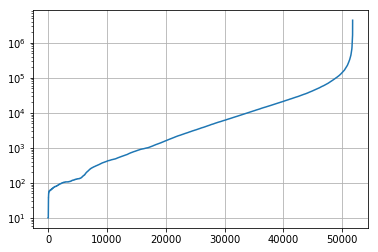

In [22]:
fig, ax = plt.subplots()
ax.plot(sorted(gene_lengths))
ax.grid()
ax.set_yscale("log")
plt.show()

In [15]:
# get sequences
dict_seq = utils.get_sequences('mm10')

In [16]:
for key, value in dict_seq.items():
    print(key)
    print(len(value))

df_chrom_sizes

1
195471971
2
182113224
3
160039680
4
156508116
5
151834684
6
149736546
7
145441459
8
129401213
9
124595110
10
130694993
11
122082543
12
120129022
13
120421639
14
124902244
15
104043685
16
98207768
17
94987271
18
90702639
19
61431566
X
171031299


,size
1,195471971
2,182113224
3,160039680
4,156508116
5,151834684
6,149736546
7,145441459
8,129401213
9,124595110
10,130694993


In [24]:
gene_cs = []
for idx, row in df_gene.iterrows():
    gene_seq = dict_seq[row.chr[len('chr'):]][(row.start-1):row.end]
    num_c = gene_seq.upper().count('C')
    num_ca = gene_seq.upper().count('CA')
    num_cg = gene_seq.upper().count('CG')
    num_ch = num_c - num_cg 
    gene_cs.append({'C': num_c, 
                    'CA': num_ca, 
                    'CG': num_cg, 
                    'CH': num_ch})
    
gene_cs = pd.DataFrame(gene_cs, index=df_gene.index)
gene_cs['length'] = gene_lengths
gene_cs.head()

,C,CA,CG,CH,length
gene_id,,,,,
ENSMUSG00000102693.1,160,60,3,157,1070
ENSMUSG00000064842.1,20,12,2,18,110
ENSMUSG00000051951.5,89689,34713,2266,87423,465598
ENSMUSG00000102851.1,105,36,3,102,480
ENSMUSG00000103377.1,517,187,12,505,2819


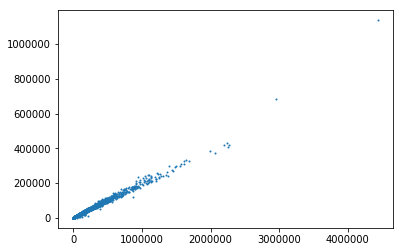

In [25]:
fig, ax = plt.subplots()
ax.scatter(gene_lengths, gene_cs.C, s=1)
plt.show()

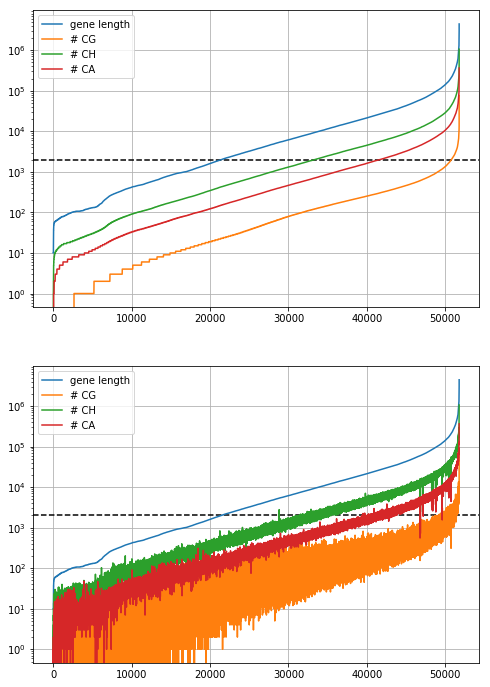

In [26]:
gene_cs.sort_values('length', inplace=True)

fig, axs = plt.subplots(2, 1, figsize=(8, 12))
ax = axs[0]
ax.axhline(y=2000, color='black', linestyle='--')
ax.plot(sorted(gene_cs.length), label='gene length')
ax.plot(sorted(gene_cs.CG), label='# CG')
ax.plot(sorted(gene_cs.CH), label='# CH')
ax.plot(sorted(gene_cs.CA), label='# CA')
ax.grid()
ax.legend()
ax.set_yscale("log")

ax = axs[1]
ax.axhline(y=2000, color='black', linestyle='--')
ax.plot(gene_cs.length.values, label='gene length')
ax.plot(gene_cs.CG.values, label='# CG')
ax.plot(gene_cs.CH.values, label='# CH')
ax.plot(gene_cs.CA.values, label='# CA')
ax.grid()
ax.legend()
ax.set_yscale("log")
plt.show()

In [48]:
# import existing data to look at real coverage

mcg_f = '/cndd/Public_Datasets/single_cell_methylome/gene_level/mouse/combined_sample_mCG_genebody.txt'
mch_f = '/cndd/Public_Datasets/single_cell_methylome/gene_level/mouse/combined_sample_mCH_genebody.txt'

df_mcg = pd.read_table(mcg_f, index_col='gene_id')
df_mch = pd.read_table(mch_f, index_col='gene_id')
print(df_mcg.shape)
print(df_mch.shape)

/cndd/fangming/venvs/venv_banjo_snmcseq/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(46832, 8073)
(46832, 8073)


In [49]:
df_mch.groupby('chr').count()


,name,start,end,strand,nuclei-261_S1_L001_mc,nuclei-261_S1_L001_c,nuclei-262_S2_L001_mc,nuclei-262_S2_L001_c,nuclei-263_S3_L001_mc,nuclei-263_S3_L001_c,...,Pool_999_AD006_indexed_mc,Pool_999_AD006_indexed_c,Pool_99_AD002_indexed_mc,Pool_99_AD002_indexed_c,Pool_99_AD006_indexed_mc,Pool_99_AD006_indexed_c,Pool_9_AD002_indexed_mc,Pool_9_AD002_indexed_c,Pool_9_AD006_indexed_mc,Pool_9_AD006_indexed_c
chr,,,,,,,,,,,,,,,,,,,,,
1,3427,3427,3427,3427,3427,3427,3427,3427,3427,3427,...,3427,3427,3427,3427,3427,3427,3427,3427,3427,3427
2,3776,3776,3776,3776,3776,3776,3776,3776,3776,3776,...,3776,3776,3776,3776,3776,3776,3776,3776,3776,3776
3,2893,2893,2893,2893,2893,2893,2893,2893,2893,2893,...,2893,2893,2893,2893,2893,2893,2893,2893,2893,2893
4,2867,2867,2867,2867,2867,2867,2867,2867,2867,2867,...,2867,2867,2867,2867,2867,2867,2867,2867,2867,2867
5,3252,3252,3252,3252,3252,3252,3252,3252,3252,3252,...,3252,3252,3252,3252,3252,3252,3252,3252,3252,3252
6,3133,3133,3133,3133,3133,3133,3133,3133,3133,3133,...,3133,3133,3133,3133,3133,3133,3133,3133,3133,3133
7,4721,4721,4721,4721,4721,4721,4721,4721,4721,4721,...,4721,4721,4721,4721,4721,4721,4721,4721,4721,4721
8,2312,2312,2312,2312,2312,2312,2312,2312,2312,2312,...,2312,2312,2312,2312,2312,2312,2312,2312,2312,2312
9,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180,...,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180


In [50]:
df_gene.groupby('chr').count()

,gene_name,start,end,strand,gene_type
chr,,,,,
chr1,3441,3441,3441,3441,3441
chr10,2629,2629,2629,2629,2629
chr11,3011,3011,3011,3011,3011
chr12,2466,2466,2466,2466,2466
chr13,2499,2499,2499,2499,2499
chr14,2532,2532,2532,2532,2532
chr15,1599,1599,1599,1599,1599
chr16,1198,1198,1198,1198,1198
chr17,1729,1729,1729,1729,1729


In [51]:
df_mcg = df_mcg.filter(regex='_c$')
df_mch = df_mch.filter(regex='_c$')

print(df_mcg.shape)
print(df_mch.shape)


(46832, 4034)
(46832, 4034)


In [35]:
df_mcg.head()

,nuclei-261_S1_L001_c,nuclei-262_S2_L001_c,nuclei-263_S3_L001_c,nuclei-264_S4_L001_c,nuclei-265_S5_L001_c,nuclei-266_S6_L001_c,nuclei-267_S7_L001_c,nuclei-268_S8_L001_c,nuclei-269_S9_L001_c,nuclei-270_S10_L001_c,...,Pool_997_AD002_indexed_c,Pool_997_AD006_indexed_c,Pool_998_AD002_indexed_c,Pool_998_AD006_indexed_c,Pool_999_AD002_indexed_c,Pool_999_AD006_indexed_c,Pool_99_AD002_indexed_c,Pool_99_AD006_indexed_c,Pool_9_AD002_indexed_c,Pool_9_AD006_indexed_c
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000064842.1,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000051951.5,73,64,86,39,106,54,100,103,107,62,...,114,133,68,108,143,159,78,183,103,3
ENSMUSG00000102851.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,1,0,0,0
ENSMUSG00000103377.1,1,0,0,0,1,0,0,0,0,0,...,7,0,0,0,0,0,0,2,2,0
ENSMUSG00000104017.1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [32]:
df_mch.head()

,nuclei-261_S1_L001_c,nuclei-262_S2_L001_c,nuclei-263_S3_L001_c,nuclei-264_S4_L001_c,nuclei-265_S5_L001_c,nuclei-266_S6_L001_c,nuclei-267_S7_L001_c,nuclei-268_S8_L001_c,nuclei-269_S9_L001_c,nuclei-270_S10_L001_c,...,Pool_997_AD002_indexed_c,Pool_997_AD006_indexed_c,Pool_998_AD002_indexed_c,Pool_998_AD006_indexed_c,Pool_999_AD002_indexed_c,Pool_999_AD006_indexed_c,Pool_99_AD002_indexed_c,Pool_99_AD006_indexed_c,Pool_9_AD002_indexed_c,Pool_9_AD006_indexed_c
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000064842.1,0,0,0,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000051951.5,3032,2006,3314,2358,2577,2457,2856,2618,3712,2565,...,4263,5473,3320,4524,3545,6173,3120,6862,3570,314
ENSMUSG00000102851.1,0,0,0,0,0,0,0,0,0,0,...,0,12,0,38,14,17,15,0,0,0
ENSMUSG00000103377.1,14,0,0,0,19,0,0,48,0,0,...,187,46,0,48,0,0,0,38,38,45
ENSMUSG00000104017.1,46,0,0,0,0,0,0,0,77,0,...,32,14,0,29,0,37,0,0,0,0


In [52]:
# select genes that are not covered in 10% of cells 

df_mch_stat = pd.DataFrame(index=df_mch.index)
df_mch_stat['cov0'] = (df_mch>0).sum(axis=1)/df_mch.shape[1]
df_mch_stat['cov10'] = (df_mch>10).sum(axis=1)/df_mch.shape[1]
df_mch_stat['cov100'] = (df_mch>100).sum(axis=1)/df_mch.shape[1]


In [53]:
gene_cs2 = pd.merge(df_mch_stat, gene_cs, left_index=True, right_index=True)

In [54]:
gene_cs2.shape

(41593, 8)

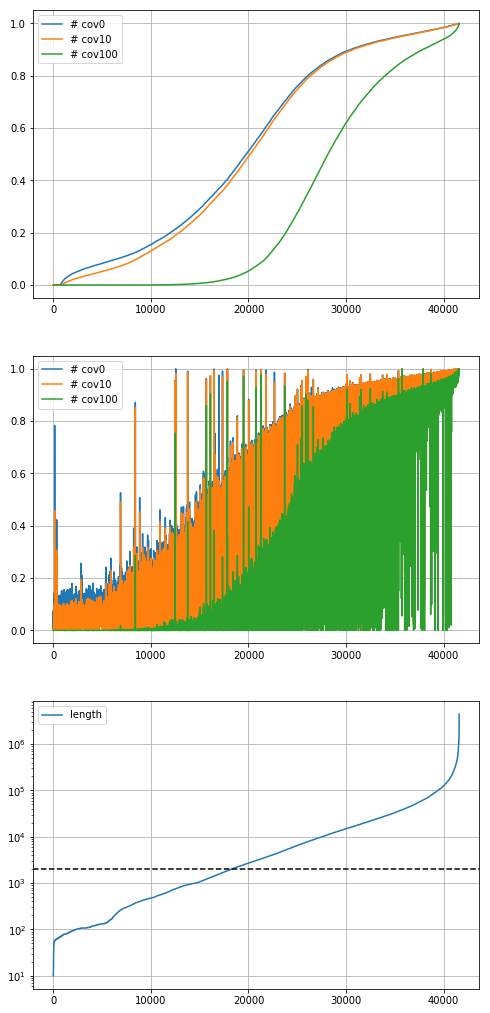

In [59]:

gene_cs2.sort_values('length', inplace=True)

fig, axs = plt.subplots(3, 1, figsize=(8, 18))
ax = axs[0]
# ax.axhline(y=2000, color='black', linestyle='--')
# ax.plot(sorted(gene_cs2.length), label='gene length')
# ax.plot(sorted(gene_cs2.CG), label='# CG')
# ax.plot(sorted(gene_cs2.CH), label='# CH')
# ax.plot(sorted(gene_cs2.CA), label='# CA')
ax.plot(sorted(gene_cs2.cov0), label='# cov0')
ax.plot(sorted(gene_cs2.cov10), label='# cov10')
ax.plot(sorted(gene_cs2.cov100), label='# cov100')
ax.grid()
ax.legend()

ax = axs[1]
# ax.axhline(y=2000, color='black', linestyle='--')
# ax.plot(gene_cs2.length.values, label='gene length')
# ax.plot(gene_cs2.CG.values, label='# CG')
# ax.plot(gene_cs2.CH.values, label='# CH')
# ax.plot(gene_cs2.CA.values, label='# CA')
ax.plot(gene_cs2.cov0.values, label='# cov0')
ax.plot(gene_cs2.cov10.values, label='# cov10')
ax.plot(gene_cs2.cov100.values, label='# cov100')
ax.grid()
ax.legend()

ax = axs[2]
ax.plot(gene_cs2.length.values, label='length')
ax.axhline(y=2000, color='black', linestyle='--')
ax.set_yscale('log')
ax.grid()
ax.legend()
plt.show()


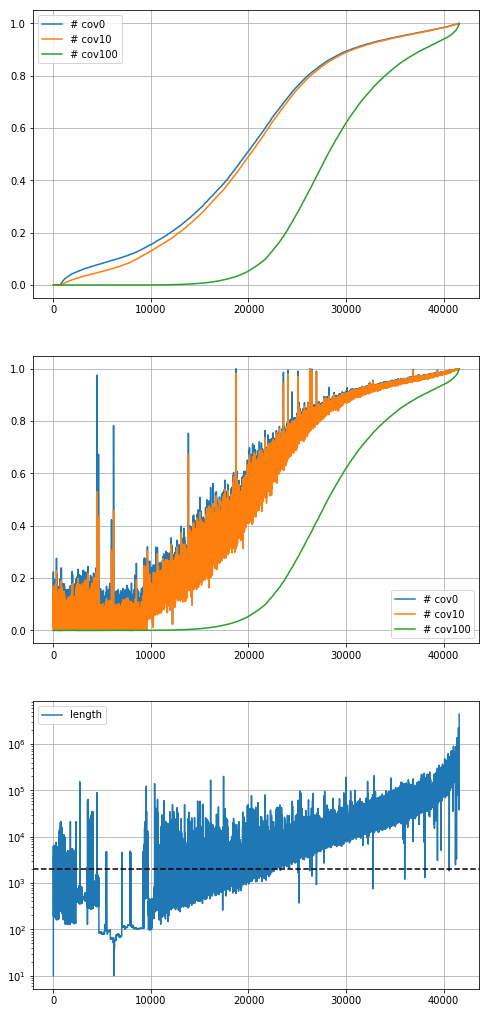

In [60]:

gene_cs2.sort_values('cov100', inplace=True)

fig, axs = plt.subplots(3, 1, figsize=(8, 18))
ax = axs[0]
# ax.axhline(y=2000, color='black', linestyle='--')
# ax.plot(sorted(gene_cs2.length), label='gene length')
# ax.plot(sorted(gene_cs2.CG), label='# CG')
# ax.plot(sorted(gene_cs2.CH), label='# CH')
# ax.plot(sorted(gene_cs2.CA), label='# CA')
ax.plot(sorted(gene_cs2.cov0), label='# cov0')
ax.plot(sorted(gene_cs2.cov10), label='# cov10')
ax.plot(sorted(gene_cs2.cov100), label='# cov100')
ax.grid()
ax.legend()

ax = axs[1]
# ax.axhline(y=2000, color='black', linestyle='--')
# ax.plot(gene_cs2.length.values, label='gene length')
# ax.plot(gene_cs2.CG.values, label='# CG')
# ax.plot(gene_cs2.CH.values, label='# CH')
# ax.plot(gene_cs2.CA.values, label='# CA')
ax.plot(gene_cs2.cov0.values, label='# cov0')
ax.plot(gene_cs2.cov10.values, label='# cov10')
ax.plot(gene_cs2.cov100.values, label='# cov100')
ax.grid()
ax.legend()

ax = axs[2]
ax.plot(gene_cs2.length.values, label='length')
ax.axhline(y=2000, color='black', linestyle='--')
ax.set_yscale('log')
ax.grid()
ax.legend()
plt.show()